# Fixed subregions

It is somethomes necessary to "fix" specific regions of the mesh to ensure they do not change during driving. In order to do that, the first step is to create a mesh and specify subregions we want to keep fixed.

As an example, let us simulate a simple one-dimensional sample and define subregions in such a way that the first and the last discretisation cell remain fixed.

In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-30e-9, 0, 0), p2=(30e-9, 3e-9, 3e-9))
cell = (3e-9, 3e-9, 3e-9)
subregions = {'fixed1': df.Region(p1=(-30e-9, 0, 0), p2=(-27e-9, 3e-9, 3e-9)),
              'free': df.Region(p1=(-27e-9, 0, 0), p2=(27e-9, 3e-9, 3e-9)),
              'fixed2': df.Region(p1=(27e-9, 0, 0), p2=(30e-9, 3e-9, 3e-9))}
mesh = df.Mesh(region=region, cell=cell, subregions=subregions)

mesh.k3d_subregions()

Output()

Now, let us define a system whose energy equation consists of only Exchange energy:

In [2]:
system = mm.System(name='fixed_spins')
system.energy = mm.Exchange(A=1e-12)

We are going to initialise the magnetisation in `fixed1` region to be $(0, 0, 1)$ and in `fixed2` region $(0, 0, -1)$. In the `free` region, we are going to choose $(1, 0, 0)$ for initial magnetisation.

In [3]:
m = {'fixed1': (0, 0, 1), 'fixed2': (0, 0, -1), 'free': (1, 0, 0)}
system.m = df.Field(mesh, dim=3, value=m, norm=1e6)

The magnetisation is now:

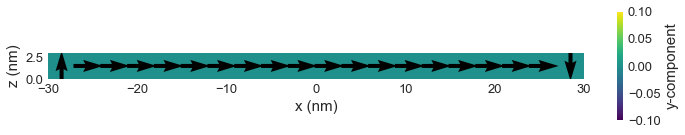

In [4]:
system.m.plane('y').mpl(figsize=(12, 2))

Finally, we can drive the system. In this case, we are going to choose `MinDriver`. When we call `drive` method, we have to pass `fixed_subregions` argument, which is a list of subregions names we want to keep fixed duriing relaxation.

In [5]:
md = mc.MinDriver()
md.drive(system, fixed_subregions=['fixed1', 'fixed2'])

Running OOMMF (ExeOOMMFRunner)[2022/02/25 18:09]... (0.6 s)


The relaxed magnetisation is:

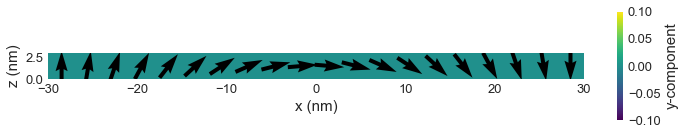

In [6]:
system.m.plane('y').mpl(figsize=(12, 2))

From the resulting magnetisation field, we can see that the first anf the ;last spin have remained the same as in the initial magnetisation and a Neel domain wall has formed in between due to the exchange energy.